# Greatest Economy in History?

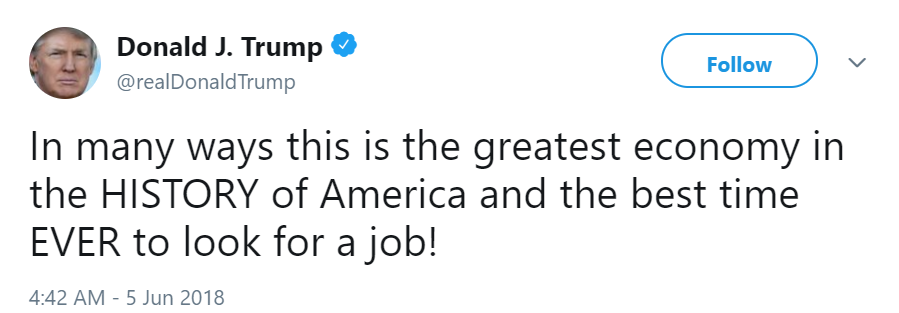

In [1]:
from IPython.display import Image
Image('assets/trumptweet.PNG')

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Read in the GDP Data

In [3]:
df = pd.read_csv('data/GDP.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.tail()

,DATE,GDPC1
280,2017-01-01,16903.240
281,2017-04-01,17031.085
282,2017-07-01,17163.894
283,2017-10-01,17286.497
284,2018-01-01,17379.728


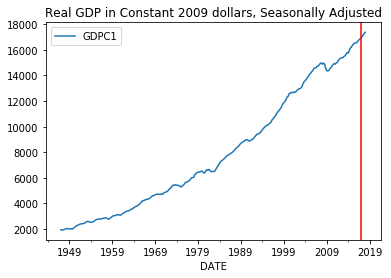

In [4]:
df.set_index('DATE', inplace=True)
df.plot()
plt.title('Real GDP in Constant 2009 dollars, Seasonally Adjusted')
plt.axvline('2017-01-01', color='r')

## Lets look at in Percent Differences

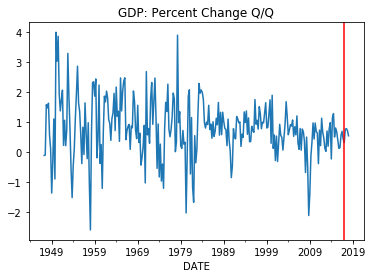

In [5]:
df['gdp_pct_change'] = df['GDPC1'].pct_change() * 100
df['gdp_pct_change'].plot()
plt.title('GDP: Percent Change Q/Q')
plt.axvline('2017-01-01',color='r')

## Lets zoom in

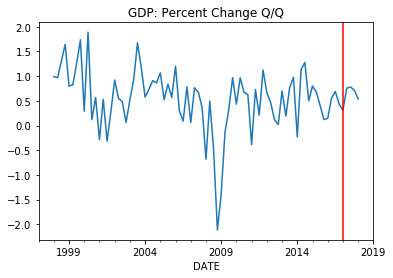

In [6]:
zoom = df['1998':]
zoom['gdp_pct_change'].plot()
plt.title('GDP: Percent Change Q/Q')
plt.axvline(x='2017-01-01', color='r')

## Lets look at this on 4 quarter rolling average basis

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


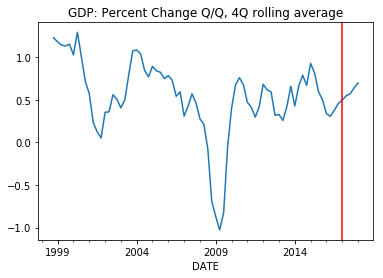

In [7]:
zoom['mvg_avg'] = zoom['gdp_pct_change'].rolling(4).mean()
zoom['mvg_avg'].plot()
plt.title('GDP: Percent Change Q/Q, 4Q rolling average')
plt.axvline('2017-01-01', color='red')

## What about momentum?

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


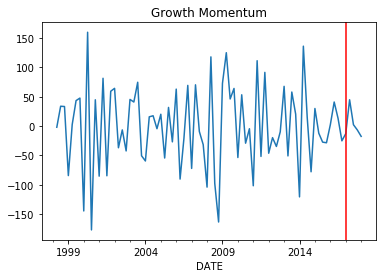

In [8]:
zoom['momentum'] = zoom['gdp_pct_change'].diff() * 100
zoom['momentum'].plot()
plt.title('Growth Momentum')
plt.axvline('2017-01-01', color='r')

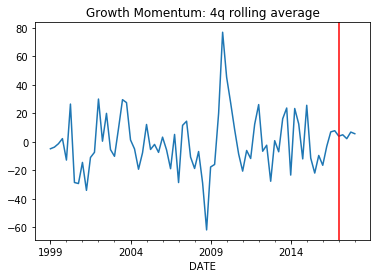

In [9]:
zoom['momentum'].rolling(4).mean().plot()
plt.title('Growth Momentum: 4q rolling average')
plt.axvline('2017-01-01', color='r')